1. Please do a simple EDA for the dataset.
2. Pre-process the continuous and discrete data.
3. Build the logistic regression model.
4. Predict the data and show the confusion matrix. Please explain it in details.
5. Use KNN, Decision tree, random forest, SVM, and neural network to predict the data and show the confusion matrix. Please explain your results in details.
6. Among all these questions, what is your best result? Explain why you regard it as the best result.   
7. Bonus points will be given for those who use their own data. 

# 0851105楊家鋐

In [2]:
# pre-processing data
import pandas as pd
import numpy as np
from numpy import mat
# standardize the Data
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
# draw graph
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1.A simple EDA for the dataset.

In [3]:
csv_file = 'Bitcoin Historical Data_mod.csv'
data_btc = pd.read_csv(csv_file)
data_btc = data_btc.drop(['Date'], axis=1)
data_btc.head()

,Price,Open,High,Low,Vol.,Change %
0,995.4,963.4,1001.6,956.1,41.15,0.03
1,1017.0,995.4,1031.7,990.2,64.95,0.02
2,1033.3,1017.0,1035.5,1006.5,54.79,0.02
3,1135.4,1033.3,1148.5,1022.3,156.27,0.10
4,989.3,1135.4,1150.6,874.5,240.01,-0.13


In [12]:
csv_file = 'Ethereum Historical Data_mod.csv'
data_eth = pd.read_csv(csv_file)
date = data_eth['Date']
data_eth = data_eth.drop(['Date'], axis=1)
data_eth.head()

,Price,Open,High,Low,Vol.,Change %
0,8.20,8.17,8.59,8.03,144.92,0.0250
1,8.37,8.19,8.50,8.11,101.27,0.0207
2,9.74,8.43,9.90,8.30,603.42,0.1637
3,11.00,9.57,11.10,9.44,556.25,0.1294
4,10.15,11.16,11.70,9.20,490.64,-0.0773


    Price    Open    High     Low    Vol.  Change %
0   995.4   963.4  1001.6   956.1   41.15      0.03
1  1017.0   995.4  1031.7   990.2   64.95      0.02
2  1033.3  1017.0  1035.5  1006.5   54.79      0.02
3  1135.4  1033.3  1148.5  1022.3  156.27      0.10
4   989.3  1135.4  1150.6   874.5  240.01     -0.13


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 720x720 with 0 Axes>

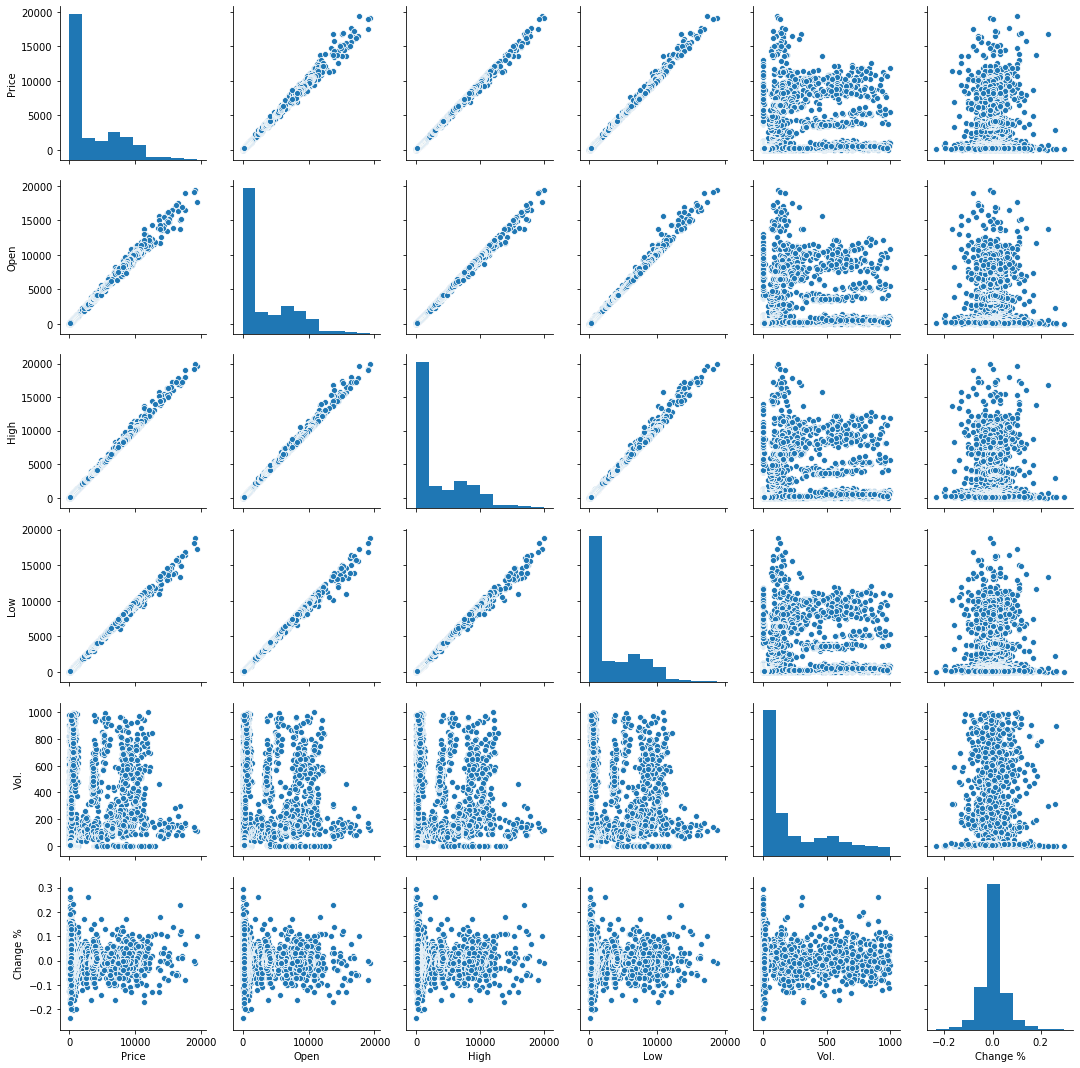

In [6]:
df_training = pd.concat([data_btc,data_eth])
print(df_training.head())
plt.figure(figsize=(10,10))
sns.pairplot(df_training[['Price','Open','High','Low','Vol.','Change %']])

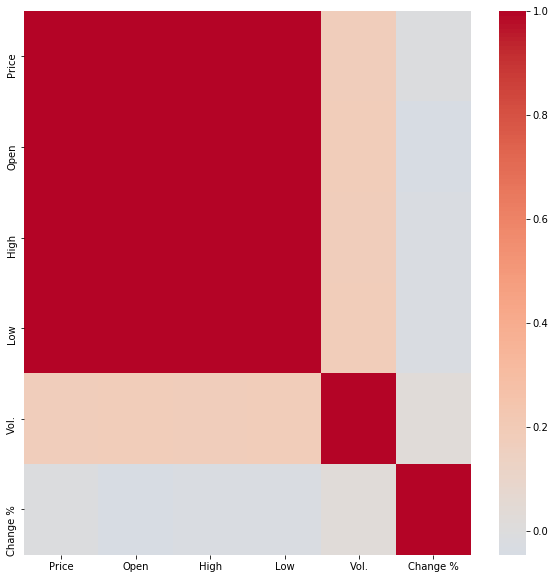

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df_training.corr(), annot = False, center=0.0, cmap='coolwarm');
plt.savefig('heatmap.png')
plt.show()

In [34]:
csv_file = 'Training Data.csv'
X = pd.read_csv(csv_file)
X = X.drop(['Date'], axis=1)
X.describe()

,Price,Open,High,Low,Vol.,Change %,BTC Price,BTC Open,BTC High,BTC Low,BTC Vol.,BTC Change %
count,1053.000000,1053.000000,1053.000000,1053.000000,1052.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000
mean,300.308167,300.147892,312.490836,285.672270,212.365190,0.004685,6261.850807,6254.965242,6446.866857,6036.481766,258.786790,0.002991
std,245.516012,245.651200,257.765979,230.245924,304.820356,0.059407,3568.028232,3571.262705,3715.108226,3380.500157,248.865539,0.043880
min,8.200000,8.170000,8.500000,8.030000,1.000000,-0.234000,785.400000,785.400000,826.400000,739.500000,1.030000,-0.170500
25%,146.940000,146.140000,154.300000,140.260000,5.110000,-0.023300,3605.600000,3604.700000,3675.300000,3554.800000,76.720000,-0.015500
50%,222.570000,222.500000,230.550000,213.930000,11.420000,0.000800,6390.900000,6390.400000,6509.600000,6282.800000,157.450000,0.002700
75%,372.000000,372.000000,385.730000,351.070000,436.882500,0.030100,8539.200000,8542.600000,8735.600000,8190.600000,428.830000,0.022300
max,1380.000000,1379.900000,1423.200000,1264.400000,993.860000,0.295100,19345.500000,19346.600000,19870.600000,18750.900000,998.730000,0.255600


In [5]:
X = data_eth

In [6]:
y = data_eth['Price']

In [7]:
X.describe()

,Price,Open,High,Low,Vol.,Change %
count,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000
mean,300.308167,300.147892,312.490836,285.672270,212.163514,0.004685
std,245.516012,245.651200,257.765979,230.245924,304.745724,0.059407
min,8.200000,8.170000,8.500000,8.030000,0.000000,-0.234000
25%,146.940000,146.140000,154.300000,140.260000,5.110000,-0.023300
50%,222.570000,222.500000,230.550000,213.930000,11.390000,0.000800
75%,372.000000,372.000000,385.730000,351.070000,436.760000,0.030100
max,1380.000000,1379.900000,1423.200000,1264.400000,993.860000,0.295100


### 3.Build the logistic regression model.

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X, y.astype(int))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 4. Predict the data and show the confusion matrix. Please explain it in details.

In [14]:
def Measures(conf_matrix):
    
    TP, FP, FN, TN = conf_matrix[0, 0], conf_matrix[0, 1], conf_matrix[1, 0], conf_matrix[1, 1]

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)

    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    
    # F1 score
    F1 = (2*TP)/(2*TP+FN+FP)
    
    return TPR, ACC, F1

In [9]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [10]:
MAPE = mean_absolute_percentage_error(y, logreg.predict(X))
print(MAPE)

65.11275204656233


### 5. Use KNN, Decision tree, random forest, SVM, and neural network to predict the data and show the confusion matrix. Please explain your results in details.

KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X, y.astype(int))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
MAPE = mean_absolute_percentage_error(y, KNN.predict(X))
print(MAPE)

4.754286953346754


Decision tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X, y.astype(int))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest.fit(X, y.astype(int))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

SVM

In [21]:
from sklearn.svm import SVC

svm = SVC(kernel = 'linear', probability = True)
svm.fit(X, y.astype(int)) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
print('Logistic Regression')
print(mean_absolute_percentage_error(y, logreg.predict(X)))
print('KNN')
print(mean_absolute_percentage_error(y, KNN.predict(X)))
print('Decision Tree')
print(mean_absolute_percentage_error(y, DecisionTree.predict(X)))
print('Random Forest')
print(mean_absolute_percentage_error(y, RandomForest.predict(X)))
print('SVM')
print(mean_absolute_percentage_error(y, svm.predict(X)))

Logistic Regression
65.11275204656233
KNN
4.754286953346754
Decision Tree
0.5401266009716487
Random Forest
0.5555495558021137
SVM
0.5429334013109522


(-52.6, 1104.6, -60.60000000000001, 1448.6)

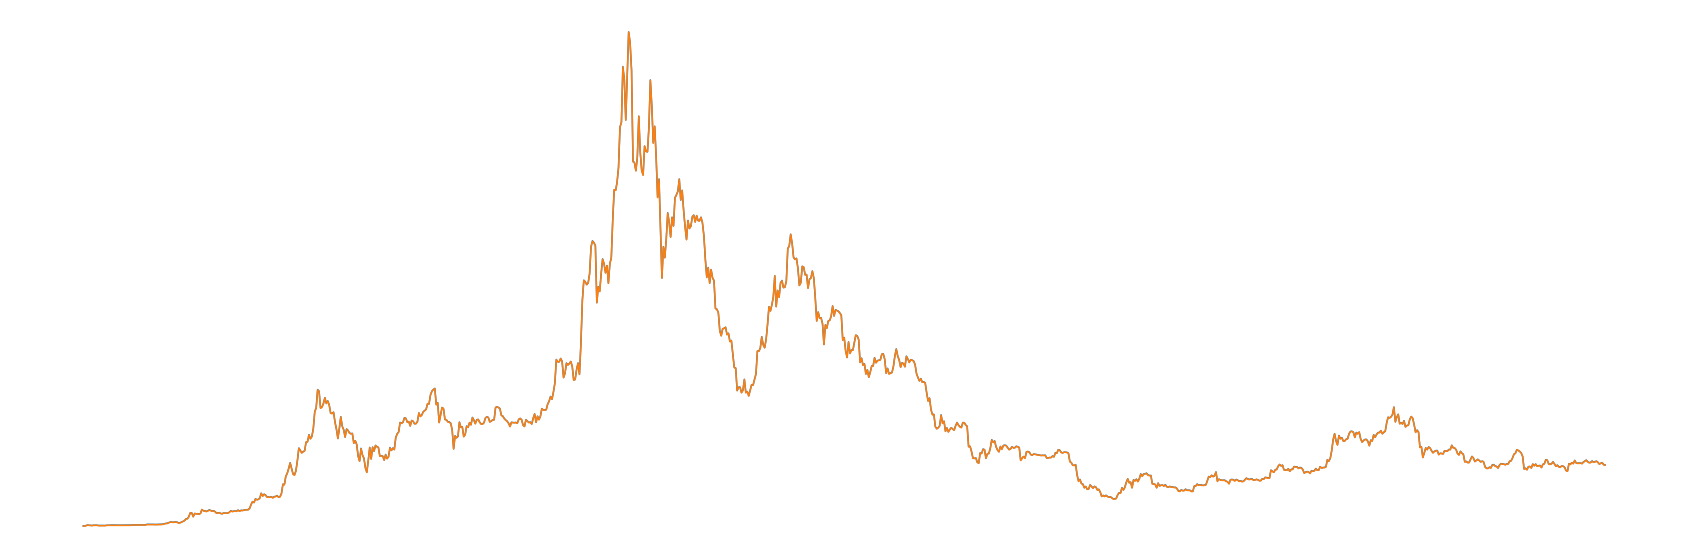

In [25]:
plt.figure(figsize = (30,10))
plt.plot(date, y, svm.predict(X))
plt.axis('off')

NN

In [16]:
from keras import backend as K

def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))
from keras import models
from keras import layers
#import keras_metrics

# build NN model
model = models.Sequential()
model.add(layers.Dense(units = 16, activation = 'relu', input_shape=(X.shape[1],)))
model.add(layers.Dense(units = 16, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy', f1_m, recall_m])
 
# start training
history = model.fit(X, y.astype(int), epochs = 20, batch_size = 128)

W1125 09:48:52.489891 12628 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1125 09:48:53.066796 12628 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/20
1053/1053 [==============================] - 0s 298us/step - loss: -118606.1379 - accuracy: 0.0000e+00 - f1_m: 1.0000 - recall_m: 1.0000
Epoch 2/20
1053/1053 [==============================] - 0s 28us/step - loss: -170482.8300 - accuracy: 0.0000e+00 - f1_m: 1.0000 - recall_m: 1.0000
Epoch 3/20
1053/1053 [==============================] - 0s 28us/step - loss: -214363.0466 - accuracy: 0.0000e+00 - f1_m: 1.0000 - recall_m: 1.0000
Epoch 4/20
1053/1053 [==============================] - 0s 25us/step - loss: -262066.2791 - accuracy: 0.0000e+00 - f1_m: 1.0000 - recall_m: 1.0000
Epoch 5/20
1053/1053 [==============================] - 0s 31us/step - loss: -312659.8307 - accuracy: 0.0000e+00 - f1_m: 1.0000 - recall_m: 1.0000
Epoch 6/20
1053/1053 [==============================] - 0s 27us/step - loss: -366682.0393 - accuracy: 0.0000e+00 - f1_m: 1.0000 - recall_m: 1.0000
Epoch 7/20
1053/1053 [==============================] - 0s 29us/step - loss: -420747.2355 - accuracy: 0.0000e+00 - f1

Recall of NN classifier on test set: 0.45
Accuracy of NN classifier on test set: 0.68
F1 Score of NN classifier on test set: 0.48


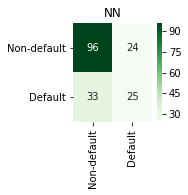

In [35]:
nn_ConfMatrix = confusion_matrix(y_test, model.predict_classes(X_test))
plt.subplot(2, 3, 3)
plt.title("NN")
plt.ylabel('True label')
plt.xlabel('Predicted label')
sns.heatmap(nn_ConfMatrix, annot=True, cmap="Greens", fmt="d"
           ,xticklabels = ['Non-default', 'Default'] 
           ,yticklabels = ['Non-default', 'Default'])

loss, accuracy, f1_score, recall = model.evaluate(X_test, y_test, verbose=0)
print('Recall of NN classifier on test set: {:.2f}'.format(recall))
print('Accuracy of NN classifier on test set: {:.2f}'.format(accuracy))
print('F1 Score of NN classifier on test set: {:.2f}'.format(f1_score))

In [17]:
print('NN')
print(mean_absolute_percentage_error(y, model.predict_classes(X)))

NN
98.94818214994717


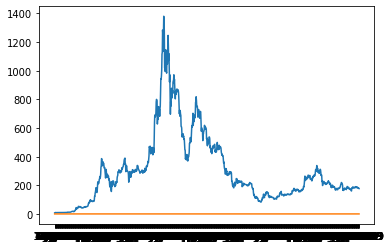

In [18]:
plt.plot(date, y, model.predict_classes(X))

In [19]:
model.predict_classes(X)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

### 6. Among all these questions, what is your best result? Explain why you regard it as the best result.

KNN has the best accuracy 0.73 